In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
data_set=pd.read_csv("C:\\Users\\TUF DASH\\Documents\\Time_Series_Analysis\\monthly-car-sales.csv")

In [2]:
data_set

,Month,Sales
0,1960-01,6550
1,1960-02,8728
2,1960-03,12026
3,1960-04,14395
4,1960-05,14587
...,...,...
103,1968-08,16722
104,1968-09,14385
105,1968-10,21342
106,1968-11,17180


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Month   108 non-null    object
 1   Sales   108 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [4]:
data_set['Month']=pd.to_datetime(data_set['Month'])

In [5]:
data_set.index=data_set['Month']

In [6]:
data_set.drop(columns='Month',inplace=True)

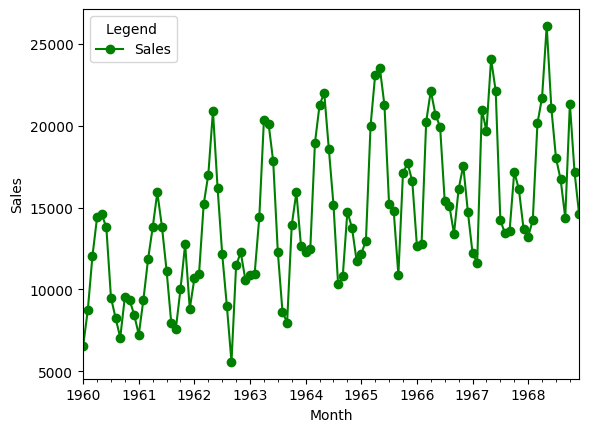

In [7]:
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

data_set.plot(color='green',marker='o')
plt.legend(title='Legend ')
plt.xlabel('Month')
plt.ylabel('Sales')



plt.show()


In [8]:
#test if the series is stationary or not (specifically test the trend with augmented Dicckey Filler Test)
from statsmodels.tsa.stattools import adfuller
def adfuller_summary(time_series):
    result = adfuller(time_series)
    summary = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Number of Lags Used': result[2],
        'Number of Observations Used': result[3],
        'Critical Values': result[4],
        'Conclusion': 'Stationary' if result[1] <= 0.05 else 'Non-Stationary'
    }
    return summary
adfuller_summary(data_set['Sales'])

{'ADF Statistic': np.float64(-1.2238127661752833),
 'p-value': np.float64(0.6632691049832871),
 'Number of Lags Used': 12,
 'Number of Observations Used': 95,
 'Critical Values': {'1%': np.float64(-3.5011373281819504),
  '5%': np.float64(-2.8924800524857854),
  '10%': np.float64(-2.5832749307479226)},
 'Conclusion': 'Non-Stationary'}

In [9]:

# Assuming you have a dataset to apply the test on
import sys
print(sys.executable)

C:\Users\TUF DASH\AppData\Local\Programs\Python\Python312\python.exe


In [10]:
data_set=data_set.diff()
data_set.dropna()

,Sales
Month,
1960-02-01,2178.0
1960-03-01,3298.0
1960-04-01,2369.0
1960-05-01,192.0
1960-06-01,-796.0
...,...
1968-08-01,-1302.0
1968-09-01,-2337.0
1968-10-01,6957.0


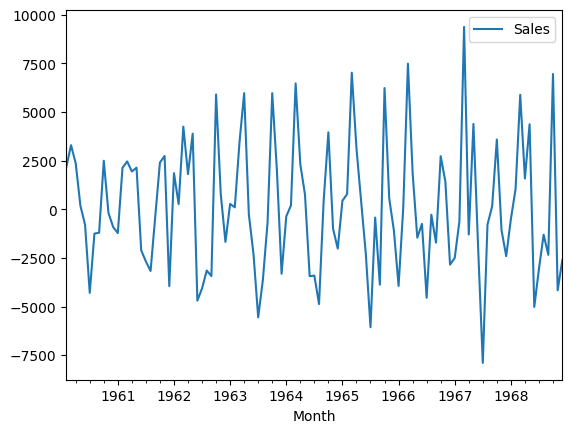

In [11]:
data_set.dropna(inplace=True)
data_set.plot()
plt.show()

In [12]:
def adfuller_summary(time_series):
    result = adfuller(time_series)
    summary = {
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Number of Lags Used': result[2],
        'Number of Observations Used': result[3],
        'Critical Values': result[4],
        'Conclusion': 'Stationary' if result[1] <= 0.05 else 'Non-Stationary'
    }
    return summary
adfuller_summary(data_set['Sales'])


{'ADF Statistic': np.float64(-6.199799230800689),
 'p-value': np.float64(5.8447525992770054e-08),
 'Number of Lags Used': 11,
 'Number of Observations Used': 95,
 'Critical Values': {'1%': np.float64(-3.5011373281819504),
  '5%': np.float64(-2.8924800524857854),
  '10%': np.float64(-2.5832749307479226)},
 'Conclusion': 'Stationary'}

In [13]:
data_set

,Sales
Month,
1960-02-01,2178.0
1960-03-01,3298.0
1960-04-01,2369.0
1960-05-01,192.0
1960-06-01,-796.0
...,...
1968-08-01,-1302.0
1968-09-01,-2337.0
1968-10-01,6957.0


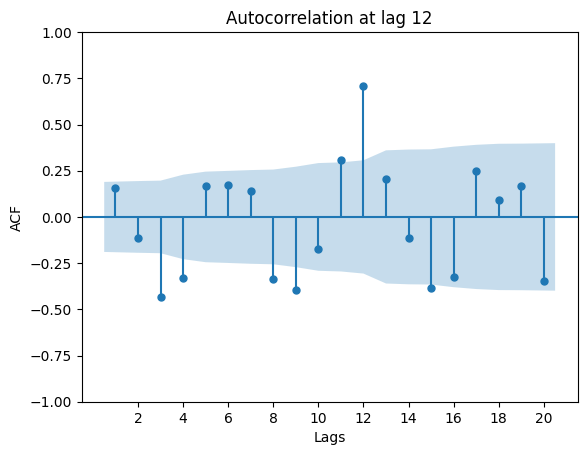

In [14]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(data_set, lags=20,zero=False)  # Adjust the number of lags as needed
plt.title('Autocorrelation at lag 12')
plt.xlabel('Lags')
plt.xticks(ticks=[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], labels=[ '2', '4', '6', '8', '10', '12','14','16','18','20'])

plt.ylabel('ACF')
plt.show()

<Figure size 1000x500 with 0 Axes>

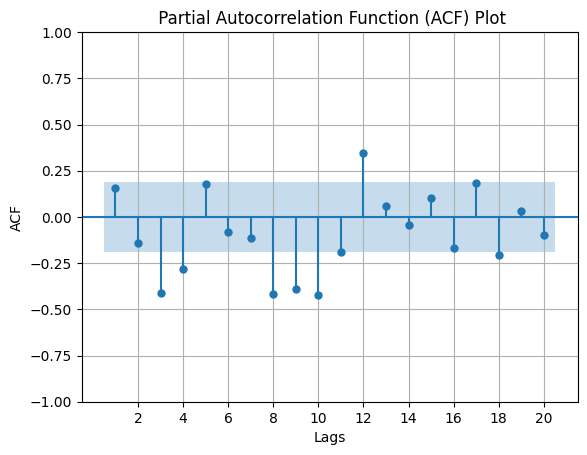

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(10, 5))
plot_pacf(data_set, lags=20,zero=False)  # Adjust the number of lags as needed
plt.title(' Partial Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.xticks(ticks=[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], labels=[ '2', '4', '6', '8', '10', '12','14','16','18','20'])

plt.ylabel('ACF')
plt.grid()
plt.show()

In [16]:
from statsmodels.tsa.arima.model import ARIMA
orders_aic_bic=[]
for p in range(3):
    for q in range(3):
        model=ARIMA(data_set,order=(p,0,q))
        results=model.fit()
        orders_aic_bic.append((p,q,results.aic,results.bic))
order_df = pd.DataFrame(orders_aic_bic, columns=['p','q','AIC','BIC'])
order_df

C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\ts

,p,q,AIC,BIC
0,0,0,2042.290006,2047.635664
1,0,1,2041.302574,2049.321061
2,0,2,2025.963081,2036.654396
3,1,0,2041.599826,2049.618313
4,1,1,2027.044987,2037.736302
5,1,2,2018.399879,2031.764023
6,2,0,2041.469231,2052.160547
7,2,1,2007.600719,2020.964863
8,2,2,2002.330194,2018.367167


In [17]:
order_df.sort_values('AIC')

,p,q,AIC,BIC
8,2,2,2002.330194,2018.367167
7,2,1,2007.600719,2020.964863
5,1,2,2018.399879,2031.764023
2,0,2,2025.963081,2036.654396
4,1,1,2027.044987,2037.736302
1,0,1,2041.302574,2049.321061
6,2,0,2041.469231,2052.160547
3,1,0,2041.599826,2049.618313
0,0,0,2042.290006,2047.635664


In [18]:
#ARIMA(2,2,2)has the lowest AIC value the best model so far 
b_model1=ARIMA(data_set,order=(2,0,2))
b_results1=b_model1.fit()
b_results1.summary()

C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  107
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -995.165
Date:                Sun, 13 Oct 2024   AIC                           2002.330
Time:                        11:01:51   BIC                           2018.367
Sample:                    02-01-1960   HQIC                          2008.831
                         - 12-01-1968                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         75.0163    397.777      0.189      0.850    -704.612     854.644
ar.L1          0.9985      0.022     45.880      0.000       0.956       1.041
ar.L2         -0.9986      0.013    -79.206      0.000      -1.023      -0.974
ma.L1         -1.0105      0.166     -6.071      0.000      -1.337      -0.684
ma.L2          0.9745      0.196      4.977      0.000       0.591       1.358
sigma2      9.337e+06      0.004   2.43e+09      0.000    9.34e+06    9.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):                 0.02
Prob(Q):                              0.35   Prob(JB):                         0.99
Heteroskedasticity (H):               1.62   Skew:                            -0.01
Prob(H) (two-sided):                  0.15   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.24e+27. Standard errors may be unstable.
"""

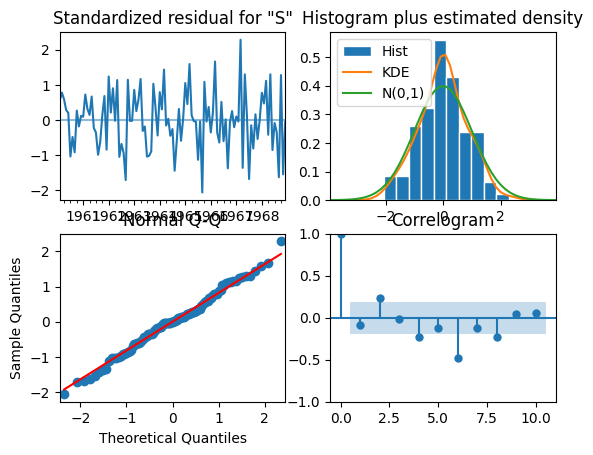

In [19]:
#diagontics 
b_results1.plot_diagnostics()
plt.show()

In [20]:
predictions=b_results1.get_prediction(start=-30,dynamic=False)
predicted_mean = predictions.predicted_mean
confidence_intervals = predictions.conf_int()
predicted_mean

1966-07-01   -2705.823661
1966-08-01    -334.516023
1966-09-01    2500.085282
1966-10-01    2940.284552
1966-11-01     645.202773
1966-12-01   -2217.651473
1967-01-01   -2801.763865
1967-02-01    -491.675465
1967-03-01    2373.996226
1967-04-01    2875.175943
1967-05-01     405.512458
1967-06-01   -2305.243258
1967-07-01   -2752.449636
1967-08-01    -332.401758
1967-09-01    2645.972334
1967-10-01    3086.193545
1967-11-01     580.769385
1967-12-01   -2425.478332
1968-01-01   -2879.578312
1968-02-01    -401.907391
1968-03-01    2467.708633
1968-04-01    2864.930370
1968-05-01     387.854758
1968-06-01   -2403.190243
1968-07-01   -2796.640185
1968-08-01    -242.047863
1968-09-01    2644.371605
1968-10-01    3038.151944
1968-11-01     564.210465
1968-12-01   -2454.004090
Freq: MS, Name: predicted_mean, dtype: float64

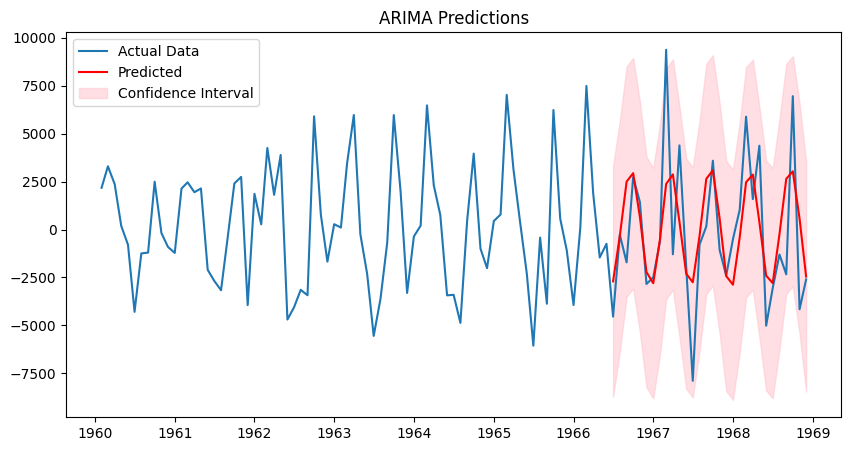

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(data_set, label='Actual Data')
plt.plot(predicted_mean.index, predicted_mean, label='Predicted', color='red')
plt.fill_between(confidence_intervals.index, confidence_intervals.iloc[:, 0], confidence_intervals.iloc[:, 1], color='pink', alpha=0.5, label='Confidence Interval')
plt.title('ARIMA Predictions')
plt.legend()
plt.show()

In [22]:
train_dataset=pd.read_csv("C:\\Users\\TUF DASH\\Documents\\Time_Series_Analysis\\monthly-car-sales.csv")
train_dataset['Month']=pd.to_datetime(train_dataset['Month'])
train_dataset.index=train_dataset['Month']
train_dataset.drop(columns='Month',axis=1,inplace=True)
train_dataset

,Sales
Month,
1960-01-01,6550
1960-02-01,8728
1960-03-01,12026
1960-04-01,14395
1960-05-01,14587
...,...
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342


<Figure size 1000x500 with 0 Axes>

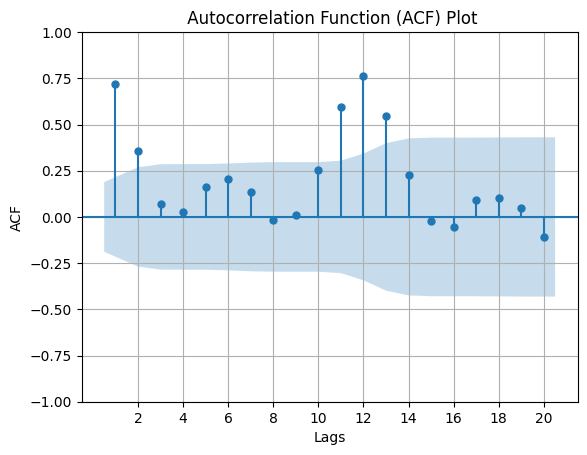

In [23]:
plt.figure(figsize=(10, 5))
plot_acf(train_dataset, lags=20,zero=False)  # Adjust the number of lags as needed
plt.title(' Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.xticks(ticks=[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], labels=[ '2', '4', '6', '8', '10', '12','14','16','18','20'])

plt.ylabel('ACF')
plt.grid()
plt.show()

<Figure size 1000x500 with 0 Axes>

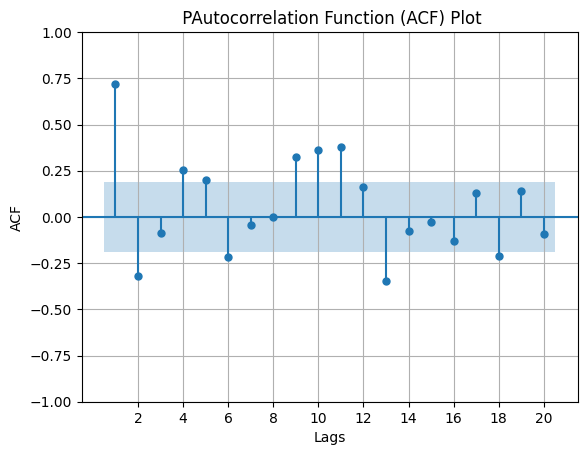

In [24]:
plt.figure(figsize=(10, 5))
plot_pacf(train_dataset, lags=20,zero=False)  # Adjust the number of lags as needed
plt.title(' PAutocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.xticks(ticks=[ 2, 4, 6, 8, 10, 12, 14, 16, 18, 20], labels=[ '2', '4', '6', '8', '10', '12','14','16','18','20'])

plt.ylabel('ACF')
plt.grid()
plt.show()

In [25]:
orders=[]
for p in range(3):
    for q in range(3):
        model=ARIMA(train_dataset,order=(p,1,q))
        rs=model.fit()
        orders.append((p,1,q,rs.aic,rs.bic))
orders=pd.DataFrame(orders)


C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\ts

In [26]:
# Renaming columns
orders= orders.rename(columns={0: 'p', 1: 'diff', 2: 'q',3: 'AIC', 4: 'BIC'})

orders.sort_values('AIC')

,p,diff,q,AIC,BIC
8,2,1,2,2004.488112,2017.852256
7,2,1,1,2015.920593,2026.611908
5,1,1,2,2026.667645,2037.358960
4,1,1,1,2032.404707,2040.423193
1,0,1,1,2039.102349,2044.448007
3,1,1,0,2039.322883,2044.668541
6,2,1,0,2039.675389,2047.693875
2,0,1,2,2039.918222,2047.936709
0,0,1,0,2040.296887,2042.969716


In [27]:
best_model=ARIMA(train_dataset,order=(2,1,2))
best_rs=best_model.fit()
best_rs.summary()

C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  108
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -997.244
Date:                Sun, 13 Oct 2024   AIC                           2004.488
Time:                        11:01:59   BIC                           2017.852
Sample:                    01-01-1960   HQIC                          2009.906
                         - 12-01-1968                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9713      0.024     40.122      0.000       0.924       1.019
ar.L2         -0.9858      0.021    -46.682      0.000      -1.027      -0.944
ma.L1         -0.8765      0.058    -15.102      0.000      -0.990      -0.763
ma.L2          0.9493      0.079     12.017      0.000       0.794       1.104
sigma2      9.339e+06   1.26e-09   7.43e+15      0.000    9.34e+06    9.34e+06
===================================================================================
Ljung-Box (L1) (Q):                   2.14   Jarque-Bera (JB):                 0.53
Prob(Q):                              0.14   Prob(JB):                         0.77
Heteroskedasticity (H):               1.53   Skew:                             0.12
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.75
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.66e+31. Standard errors may be unstable.
"""

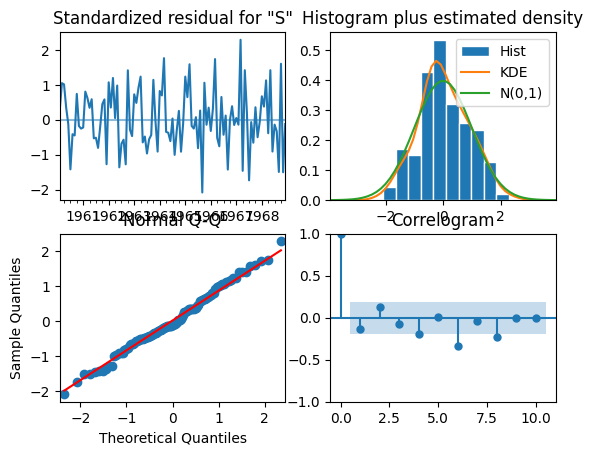

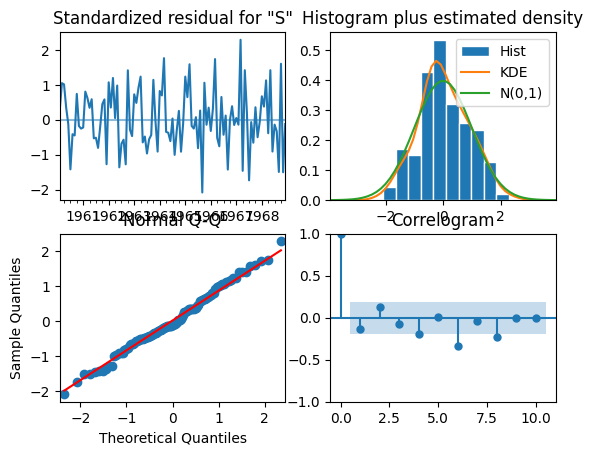

In [28]:
best_rs.plot_diagnostics()

In [29]:
train_prediction=best_rs.get_prediction(start=-10,dynamic=False)
prediction=train_prediction.predicted_mean
conf_inter=train_prediction.conf_int()
prediction=pd.DataFrame(prediction)
prediction

,predicted_mean
1968-03-01,16694.556148
1968-04-01,22906.214015
1968-05-01,21764.180067
1968-06-01,23864.570942
1968-07-01,18450.754928
1968-08-01,17731.280046
1968-09-01,18953.490523
1968-10-01,16444.337561
1968-11-01,21775.952953
1968-12-01,14954.392749


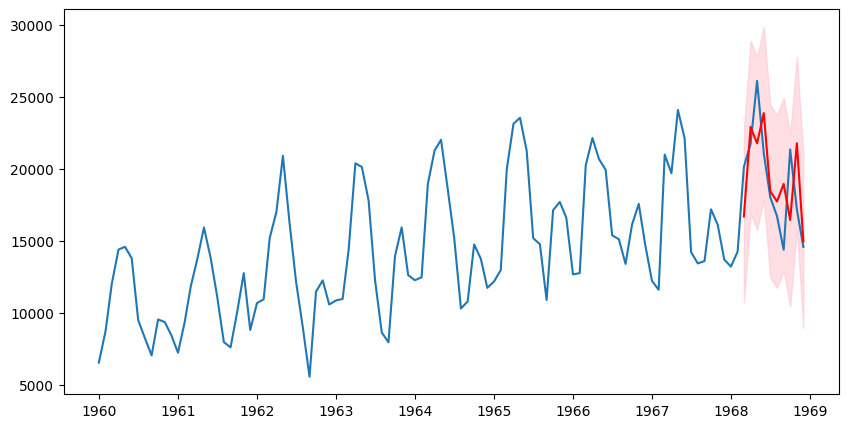

In [30]:
plt.figure(figsize=(10,5))
plt.plot(train_dataset,label='actual data')
plt.plot(prediction,color='red')
plt.fill_between(conf_inter.index, conf_inter.iloc[:, 0], conf_inter.iloc[:, 1], color='pink', alpha=0.5, label='Confidence Interval')

plt.show()



In [31]:

train_dataset.tail(10)

,Sales
Month,
1968-03-01,20139
1968-04-01,21725
1968-05-01,26099
1968-06-01,21084
1968-07-01,18024
1968-08-01,16722
1968-09-01,14385
1968-10-01,21342
1968-11-01,17180


In [32]:
from sklearn.metrics import mean_squared_error
import numpy as np
mse = mean_squared_error(prediction, train_dataset.tail(10))
print(np.sqrt(mse))

3272.70341541655



# Seasonal ARIMA 

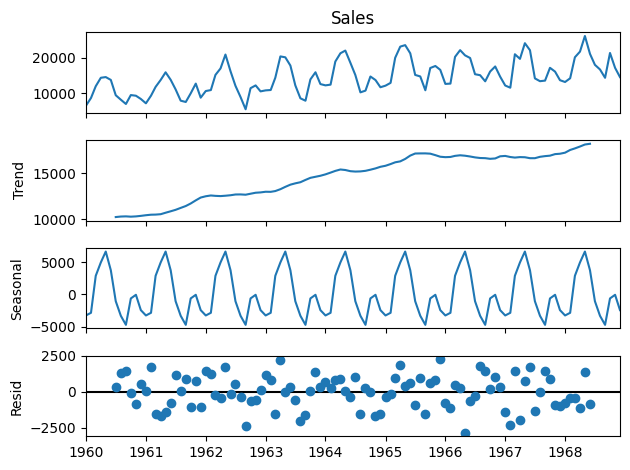

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(train_dataset['Sales'], model='additive', period= 12)

# Plot decomposition
decomp.plot()
plt.show()
#The trend component captures the long-term movement in the data, showing the overall direction over time 
#The seasonal component highlights recurring patterns that happen at regular intervals (e.g., monthly, yearly)
#The residual (or noise) is what remains after removing the trend and seasonal components. This component contains random fluctuations that are not explained by the trend or seasonality, and it helps to evaluate the unexplained variation in the data.

In [37]:
values=decomp.trend
print(values.tail())

Month
1968-08-01   NaN
1968-09-01   NaN
1968-10-01   NaN
1968-11-01   NaN
1968-12-01   NaN
Name: trend, dtype: float64


<Axes: xlabel='Month'>

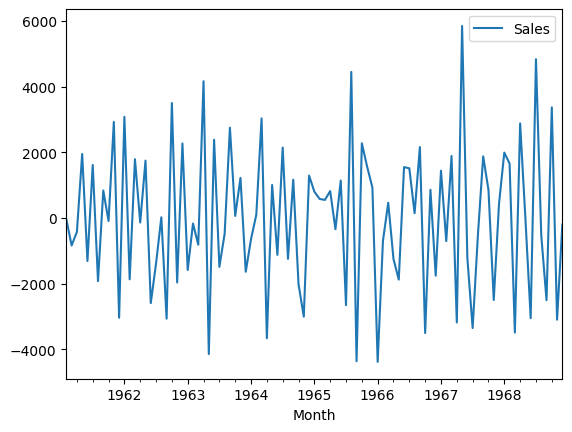

In [40]:
difference=train_dataset.diff().diff(12).dropna()
difference.plot()

In [74]:
app=[]
from statsmodels.tsa.statespace.sarimax import SARIMAX
for p in range(4):
    for q in range(4):
        for P in range(3):
            for Q in range(3):
                model=SARIMAX(train_dataset,order=(p,1,q),seasonal_order=(P,1,Q,12))
                rs_seasonal=model.fit()
                app.append((p,1,q,P,1,Q,12,rs_seasonal.aic,rs_seasonal.bic))
app
                

C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\ts

[(0,
  1,
  0,
  0,
  1,
  0,
  12,
  np.float64(1734.7902260795336),
  np.float64(1737.3441029711341)),
 (0,
  1,
  0,
  0,
  1,
  1,
  12,
  np.float64(1715.0331327911824),
  np.float64(1720.1408865743836)),
 (0,
  1,
  0,
  0,
  1,
  2,
  12,
  np.float64(1716.9989540717784),
  np.float64(1724.66058474658)),
 (0,
  1,
  0,
  1,
  1,
  0,
  12,
  np.float64(1719.0171276021267),
  np.float64(1724.1248813853279)),
 (0,
  1,
  0,
  1,
  1,
  1,
  12,
  np.float64(1716.9990540939975),
  np.float64(1724.6606847687992)),
 (0,
  1,
  0,
  1,
  1,
  2,
  12,
  np.float64(1716.5914367945306),
  np.float64(1726.806944360933)),
 (0,
  1,
  0,
  2,
  1,
  0,
  12,
  np.float64(1716.0294443403454),
  np.float64(1723.6910750151471)),
 (0,
  1,
  0,
  2,
  1,
  1,
  12,
  np.float64(1715.1334184298125),
  np.float64(1725.3489259962148)),
 (0,
  1,
  0,
  2,
  1,
  2,
  12,
  np.float64(1716.497777804245),
  np.float64(1729.2671622622477)),
 (0,
  1,
  1,
  0,
  1,
  0,
  12,
  np.float64(1700.38329

In [75]:
app=pd.DataFrame(app,columns=['p','d','q','P','D','Q','m','AIC','BIC'])

In [76]:
app

,p,d,q,P,D,Q,m,AIC,BIC
0,0,1,0,0,1,0,12,1734.790226,1737.344103
1,0,1,0,0,1,1,12,1715.033133,1720.140887
2,0,1,0,0,1,2,12,1716.998954,1724.660585
3,0,1,0,1,1,0,12,1719.017128,1724.124881
4,0,1,0,1,1,1,12,1716.999054,1724.660685
...,...,...,...,...,...,...,...,...,...
139,3,1,3,1,1,1,12,1690.185629,1713.170521
140,3,1,3,1,1,2,12,1692.029893,1717.568662
141,3,1,3,2,1,0,12,1690.295191,1713.280083
142,3,1,3,2,1,1,12,1691.314602,1716.853371


In [77]:
app.sort_values('AIC')


,p,d,q,P,D,Q,m,AIC,BIC
52,1,1,1,2,1,1,12,1683.038420,1698.361682
16,0,1,1,2,1,1,12,1683.105068,1695.874453
25,0,1,2,2,1,1,12,1683.522648,1698.845909
46,1,1,1,0,1,1,12,1683.746797,1693.962305
12,0,1,1,1,1,0,12,1684.011503,1691.673134
...,...,...,...,...,...,...,...,...,...
5,0,1,0,1,1,2,12,1716.591437,1726.806944
2,0,1,0,0,1,2,12,1716.998954,1724.660585
4,0,1,0,1,1,1,12,1716.999054,1724.660685
3,0,1,0,1,1,0,12,1719.017128,1724.124881


In [78]:
best_model=SARIMAX(train_dataset,order=(1,1,1),seasonal_order=(2,1,1,12))
best_rs=best_model.fit()
best_rs.summary()

C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\TUF DASH\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  108
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 12)   Log Likelihood                -835.519
Date:                            Sun, 13 Oct 2024   AIC                           1683.038
Time:                                    16:21:28   BIC                           1698.362
Sample:                                01-01-1960   HQIC                          1689.230
                                     - 12-01-1968                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2078      0.123      1.695      0.090      -0.032       0.448
ma.L1         -0.8984      0.056    -15.999      0.000      -1.008      -0.788
ar.S.L12      -1.2955      0.211     -6.142      0.000      -1.709      -0.882
ar.S.L24      -0.4958      0.099     -5.025      0.000      -0.689      -0.302
ma.S.L12       0.9084      0.478      1.900      0.057      -0.029       1.846
sigma2       2.25e+06   5.33e+05      4.223      0.000    1.21e+06    3.29e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 1.42
Prob(Q):                              0.74   Prob(JB):                         0.49
Heteroskedasticity (H):               1.23   Skew:                             0.30
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

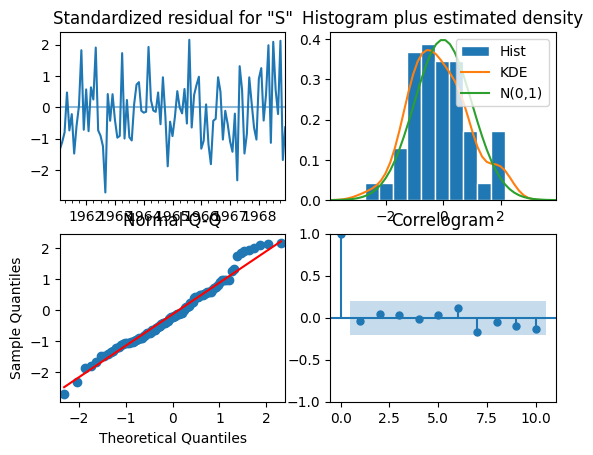

In [80]:
best_rs.plot_diagnostics()
plt.show()

In [81]:
prediction_object=best_rs.get_prediction(start=-10)
prediction_mean=prediction_object.predicted_mean
conf_int =prediction_object.conf_int()


In [82]:
prediction_mean

1968-03-01    20777.410740
1968-04-01    21093.972578
1968-05-01    23097.370791
1968-06-01    22799.838167
1968-07-01    14855.607550
1968-08-01    15873.206567
1968-09-01    14709.654259
1968-10-01    18124.033597
1968-11-01    19725.328799
1968-12-01    15536.476910
Freq: MS, Name: predicted_mean, dtype: float64

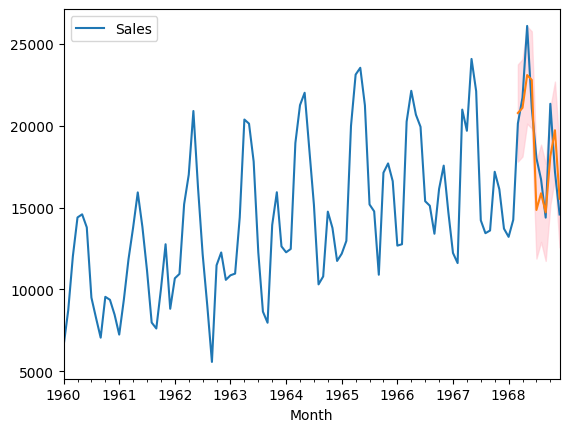

In [86]:
train_dataset.plot(label='actual data')
prediction_mean.plot()
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.5, label='Confidence Interval')


In [87]:
from sklearn.metrics import mean_squared_error
import numpy as np
prediction_mean=pd.DataFrame(prediction_mean)
mse = mean_squared_error(prediction_mean, train_dataset.tail(10))
print(np.sqrt(mse))

2034.1781193931502
